# Energy response

This notebook shows the energy response of the KM3NeT/ARCA230 detector. The instrument response function gives a distribution of reconstructed energies for each true neutrino energy.

N.B.: this is a different quantitity than shown in the paper, where the resolution is given as a function of the visible energy of an event. In this notebook, it is given as the neutrino energy, such that we can use it for analysis.

In [1]:
import matplotlib.pyplot as plt

from arca230.energyresponse import EnergyResponse
from arca230.utils import create_histogram

We initialise the energy response, and obtain the response for neutrinos with 100 TeV $\Big( \log_{10}(E_\nu \text{ [GeV]}) = 5 \Big)$

In [2]:
log_nuE = 5

eres_instance_track = EnergyResponse(file_path=f"../data/energyresponse_numuCC_track.csv") 
eres_instance_shower = EnergyResponse(file_path=f"../data/energyresponse_nueCC_shower.csv")

eres_track = eres_instance_track.energy_response(logE=log_nuE)
eres_shower = eres_instance_shower.energy_response(logE=log_nuE)

Energy response data loaded successfully.
Energy response data loaded successfully.


Let's plot!

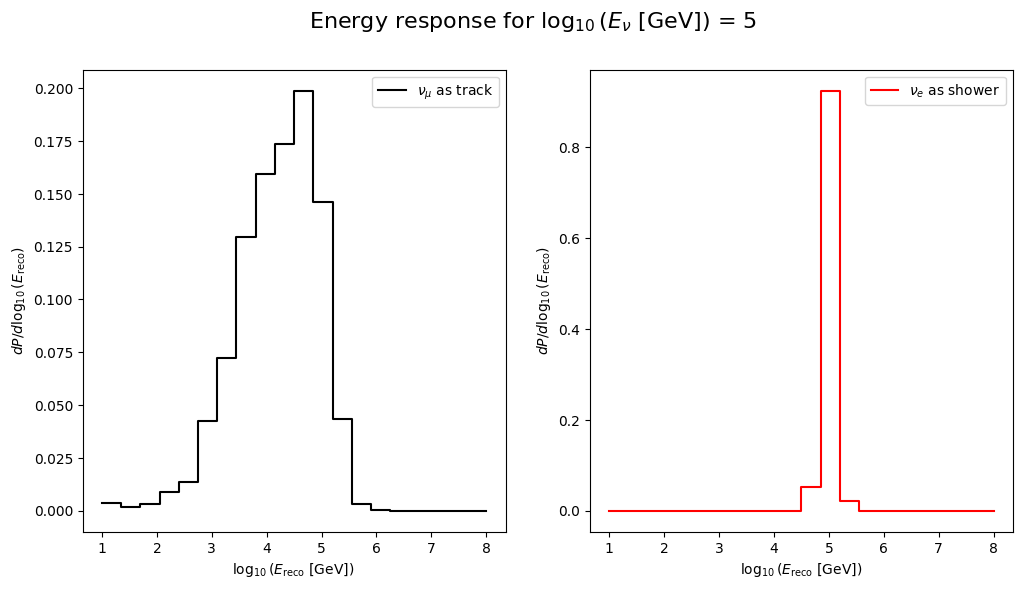

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle(r"Energy response for $\log_{10}(E_\nu$ [GeV]) = " + f"{log_nuE}", fontsize=16)

# track
axes[0].plot(
    *create_histogram(
        eres_track["log10(reco_E [GeV]) low"],
        eres_track["log10(reco_E [GeV]) high"],
        eres_track["dP/dlog10(nu_E [GeV])"],
    ),
    color="black",
    label=r"$\nu_\mu$ as track",
)
axes[0].set_xlabel(r"$\log_{10}(E_{\rm reco}$ [GeV]) ")
axes[0].set_ylabel(r"$dP/d\log_{10}(E_{\rm reco})$")
axes[0].legend(loc="best")

# shower
axes[1].plot(
    *create_histogram(
        eres_shower["log10(reco_E [GeV]) low"],
        eres_shower["log10(reco_E [GeV]) high"],
        eres_shower["dP/dlog10(nu_E [GeV])"],
    ),
    color="red",
    label=r"$\nu_e$ as shower",
)
axes[1].set_xlabel(r"$\log_{10}(E_{\rm reco}$ [GeV]) ")
axes[1].set_ylabel(r"$dP/d\log_{10}(E_{\rm reco})$")
axes[1].legend(loc="best")

plt.show()